These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [3]:
data = pd.read_csv(r'C:\Users\arjun\Desktop\Temp_files\wine.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [5]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
X=data.drop('Wine',axis=1)
y=data[['Wine']]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [9]:
print('X_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)
print('X_test.shape: ',x_test.shape)
print('y_test.shape: ',y_test.shape)

X_train.shape:  (124, 13)
y_train.shape:  (124, 1)
X_test.shape:  (54, 13)
y_test.shape:  (54, 1)


In [10]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

C:\Users\arjun\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


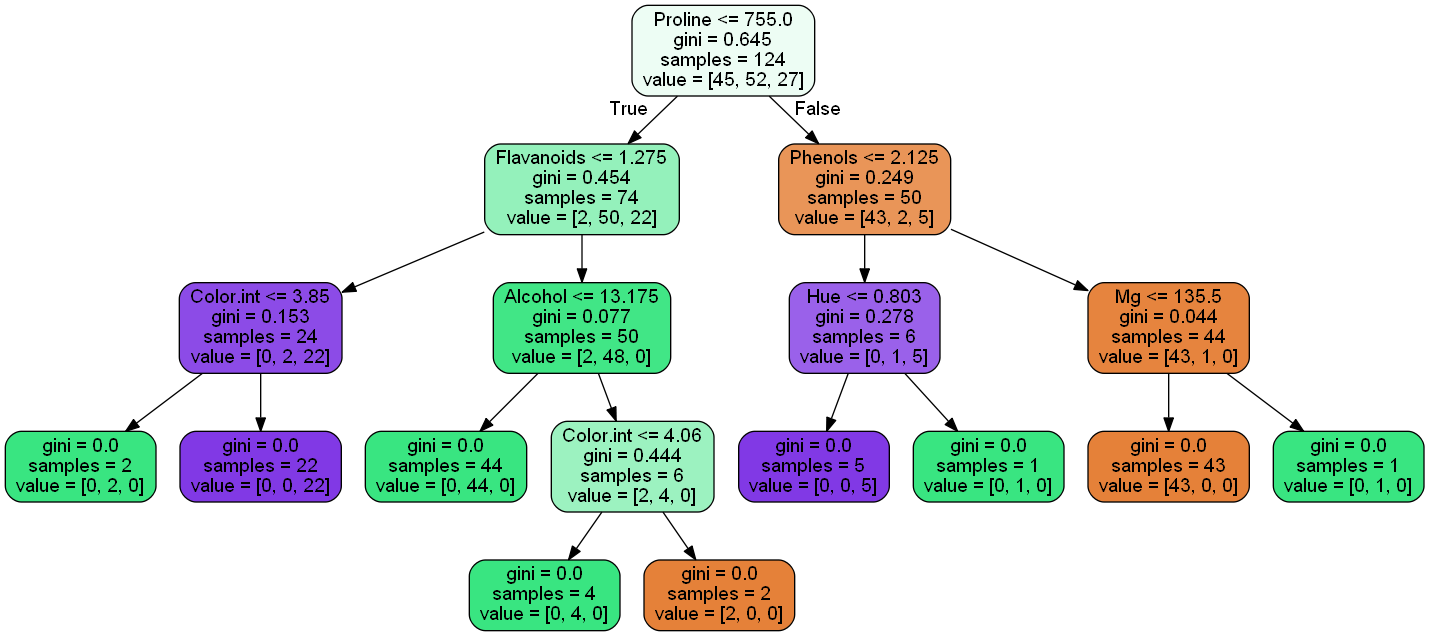

In [11]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names=X.columns,rounded=True,filled=True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('C://Users//arjun//Desktop//Temp_files//MyTree.png')
#show graph
Image(graph.create_png())

# for criterion='entropy'

In [12]:
clf1 = DecisionTreeClassifier(criterion='entropy')
clf1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

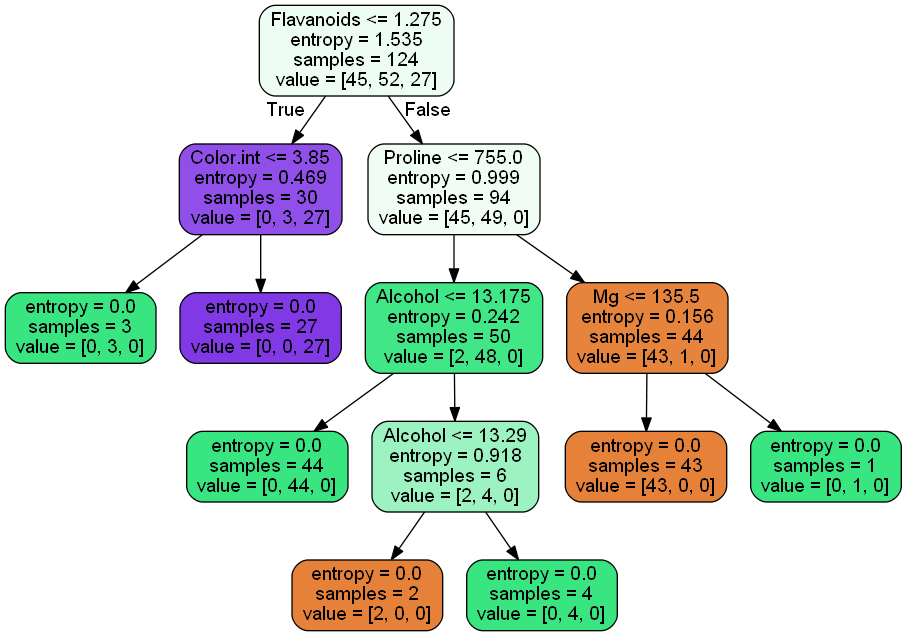

In [13]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf1,feature_names=X.columns,rounded=True,filled=True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('C://Users//arjun//Desktop//Temp_files//MyTree1.png')
#show graph
Image(graph.create_png())

In [14]:
clf.score(x_train,y_train)

1.0

In [15]:
clf.score(x_test,y_test)

0.8703703703703703

In [16]:
y_pred=clf.predict(x_test)
y_pred

array([2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 3,
       1, 3, 3, 3, 1, 1, 1, 2, 1, 2], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
acc_score= accuracy_score(y_test,y_pred)
acc_score

0.8703703703703703

In [18]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 2,  4, 15]], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       0.82      0.95      0.88        19
           3       1.00      0.71      0.83        21

    accuracy                           0.87        54
   macro avg       0.88      0.89      0.87        54
weighted avg       0.89      0.87      0.87        54



#Standard Scaller
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 100)

from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

pca = PCA(n_components=12)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])
principal_x

clf2.score(x_train,y_train)

clf2.score(x_test,y_test)

There is a little increase in our test accuracy. Great!!

In [20]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
      'criterion' : ['gini','entropy'],
      'max_depth' : range(2,32,1),
      'max_leaf_nodes': range(2,10,2),
      'min_samples_leaf' : range(1,10,1),
      'min_samples_split': range(2,10,1),
       'splitter' : ['best','random']
    
}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,
                          cv=5,n_jobs=-1)

In [25]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [26]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [27]:
grid_search.best_score_

0.968

In [28]:
clf3 = DecisionTreeClassifier(criterion= 'gini',
 max_depth = 19,
 max_leaf_nodes= 8,
 min_samples_leaf = 3,
 min_samples_split= 6,
 splitter= 'random')
clf3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [29]:
clf3.score(x_train,y_train)

0.9435483870967742

In [30]:
clf3.score(x_test,y_test)

0.8703703703703703

In [31]:
y_pred = clf3.predict(x_test)
y_pred

array([2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 1, 2, 3,
       1, 3, 3, 3, 1, 1, 1, 2, 1, 2], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.8703703703703703

In [33]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 5,  1, 15]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.95      0.95      0.95        19
           3       1.00      0.71      0.83        21

    accuracy                           0.87        54
   macro avg       0.88      0.89      0.87        54
weighted avg       0.90      0.87      0.87        54



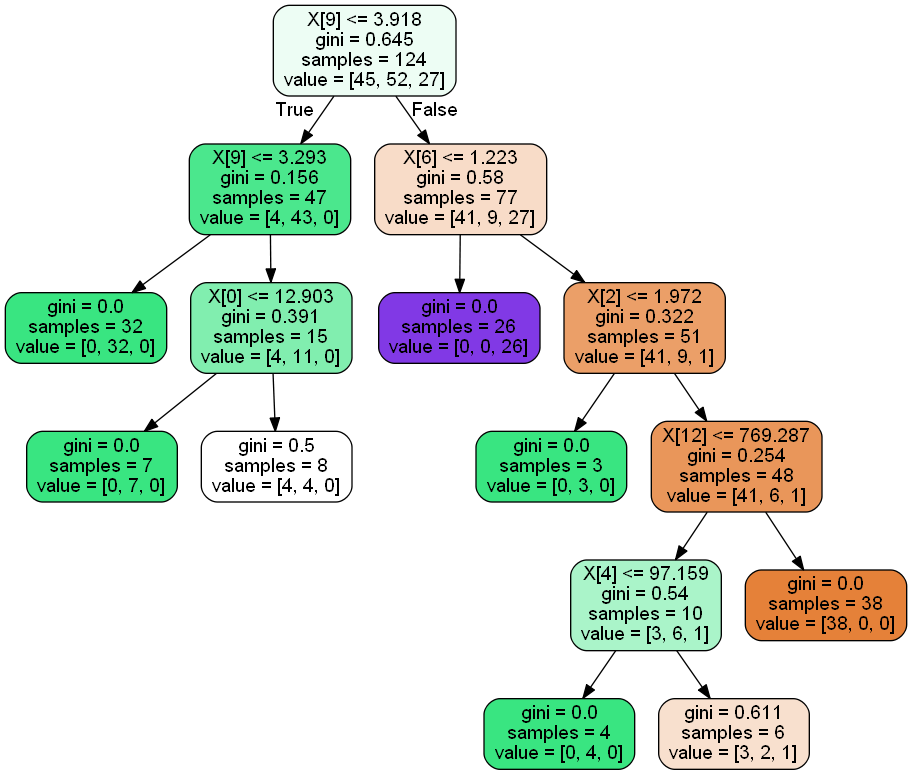

In [35]:
dot_data = export_graphviz(clf3,rounded = True,filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [39]:
# let's save the model
import pickle

#save model
pickle.dump(clf3,open('C://Users//arjun//PycharmProjects//Decision_Tree//wine.pickle','wb'))

#load model
wine_model = pickle.load(open('C://Users//arjun//PycharmProjects//Decision_Tree//wine.pickle','rb'))

# predict the output
y_pred = wine_model.predict(x_test)